In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
db=pd.read_excel("grafico.xlsx")
db.columns=["occupation","smokers","formersmokers","neversmokers","until5","from6to10","from11to20","over20","avgperday"]
db.loc[db["occupation"]=="unemployed person with work experience", "occupation"]="unemployedwithexp"
db.loc[db["occupation"]=="  middle management, white collar", "occupation"]="middle management"
db.loc[db["occupation"]=="  self-employed, family worker, co.co.co.", "occupation"]="selfemployed"
db.loc[db["occupation"]=="  blu collar, apprentice", "occupation"]="apprendice"
db.loc[db["occupation"]=="unemployed person without work experience", "occupation"]="unemployedwithoutexp"
db=db.drop(11)
print(db)


                             occupation  smokers  formersmokers  neversmokers  \
0                       employed person     24.0           24.6          50.4   
1     executive, employer, professional     20.2           28.0          50.8   
2                     middle management     19.0           24.5          55.7   
3                            apprendice     30.9           22.6          45.1   
4                          selfemployed     26.1           26.4          46.4   
5                             housewife     14.3           16.7          67.2   
6                               student     12.1            5.8          80.6   
7                               retired     11.7           37.6          49.1   
8                       other condition     17.3           18.6          61.9   
9                     unemployedwithexp     28.9           23.1          46.4   
10                 unemployedwithoutexp     20.0           14.4          63.3   

    until5  from6to10  from

          occupation  smokers  formersmokers  neversmokers  until5  from6to10  \
7            retired     11.7           37.6          49.1    23.5       37.4   
6            student     12.1            5.8          80.6    54.5       31.5   
5          housewife     14.3           16.7          67.2    26.3       42.9   
8    other condition     17.3           18.6          61.9    24.0       31.0   
2  middle management     19.0           24.5          55.7    31.7       36.9   

   from11to20  over20  avgperday  
7        35.1     4.0       11.6  
6        12.9     1.1        6.8  
5        28.9     1.8       10.3  
8        35.6     9.5       13.0  
2        29.1     2.2        9.8  


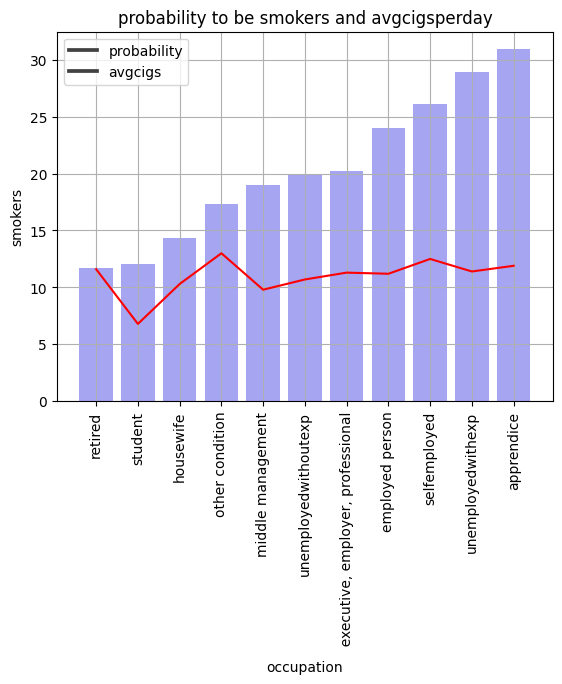

In [2]:
db1=db.copy()
db1=db1.sort_values(by=["smokers"])
sns.barplot(x=db1["occupation"], y=db1["smokers"], data=db1, color="blue",alpha=0.4)
plt.xticks(rotation=90)
print(db1.head())
plt.grid()
plt.title("probability to be smokers and avgcigsperday")
plt.plot(db1["occupation"],db1["avgperday"], color="red")
plt.legend(["probability","avgcigs"])

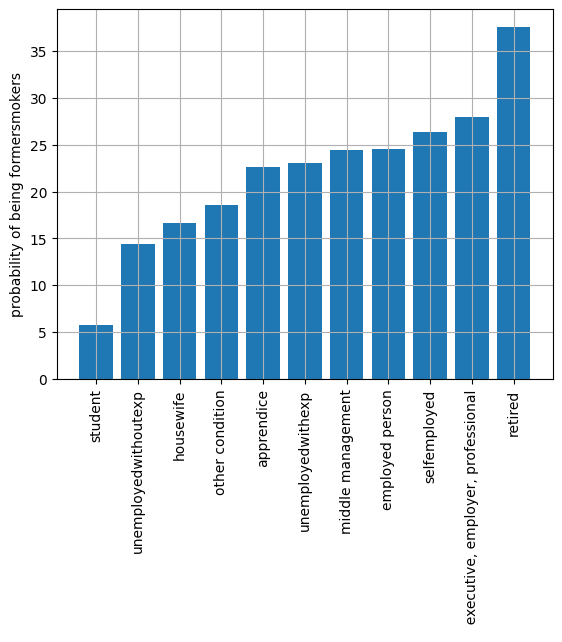

In [3]:
db=db.sort_values(by="formersmokers")
plt.bar(db["occupation"], db["formersmokers"])
plt.xticks(rotation=90)
plt.ylabel("probability of being formersmokers")
plt.grid()

In [4]:
# scaling data

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaloccupation=LabelEncoder()
db2=db1.copy()
db1["occupation"]=scaloccupation.fit_transform(db1[["occupation"]])
scalersmokers=StandardScaler()
db1["smokers"]=scalersmokers.fit_transform(db1[["smokers"]])
scalerformersmokers=StandardScaler()
db1["formersmokers"]=scalerformersmokers.fit_transform(db1[["formersmokers"]])
scalerneversmokers=StandardScaler()
db1["neversmokers"]=scalerneversmokers.fit_transform(db1[["neversmokers"]])
scaleruntil5=StandardScaler()
db1["until5"]=scaleruntil5.fit_transform(db1[["until5"]])
scalerfrom5to10=StandardScaler()
db1["from6to10"]=scalerfrom5to10.fit_transform(db1[["from6to10"]])
scalerfrom11to20=StandardScaler()
db1["from11to20"]=scalerfrom11to20.fit_transform(db1[["from11to20"]])
scalerover20=StandardScaler()
db1["over20"]=scalerover20.fit_transform(db1[["over20"]])
scaleravgperday=StandardScaler()
db1["avgperday"]=scaleravgperday.fit_transform(db1[["avgperday"]])

db1=db1.sort_index()
print(db1.head(20))

    occupation   smokers  formersmokers  neversmokers    until5  from6to10  \
0            2  0.580093       0.328880     -0.537786 -0.327617   0.105844   
1            0 -0.033778       0.763512     -0.499926  0.156642  -0.873217   
2            4 -0.227631       0.316096     -0.036139  0.393141   0.449839   
3            1  1.694751       0.073213     -1.039434 -0.856924   0.608606   
4            7  0.919337       0.558979     -0.916388 -0.755567  -1.587667   
5            3 -0.986892      -0.681001      1.052341 -0.214999   2.037506   
6            8 -1.342290      -2.074381      2.320656  2.960840  -0.979062   
7            6 -1.406908       1.990709     -0.660832 -0.530330   0.582145   
8            5 -0.502257      -0.438119      0.550693 -0.474021  -1.111367   
9            9  1.371662       0.137130     -0.916388 -0.293832   0.105844   
10          10 -0.066086      -0.975017      0.683204 -0.057333   0.661528   

    from11to20    over20  avgperday  
0     0.347815 -0.084961 

c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       variables           VIF
3         until5  65436.874309
5     from11to20  44269.812794
4      from6to10  11658.057632
2   neversmokers   6324.251183
1  formersmokers   3127.472125
6         over20   3113.260272
0        smokers   1985.019157
7      avgperday    518.002498


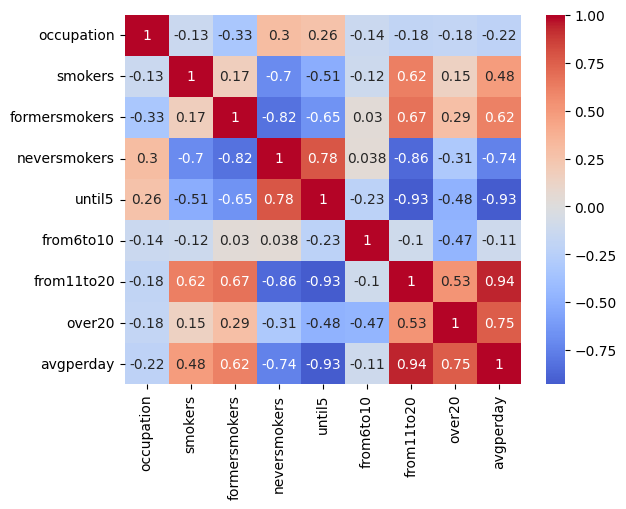

In [5]:
# calculating correlations and vif

db1.corr()
sns.heatmap(db1.corr(), annot=True, cmap="coolwarm", center=0)
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif=vif.sort_values(by=["VIF"],ascending=False)
    return vif
print(cal_vif(db1.drop(columns=["occupation"])))

c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

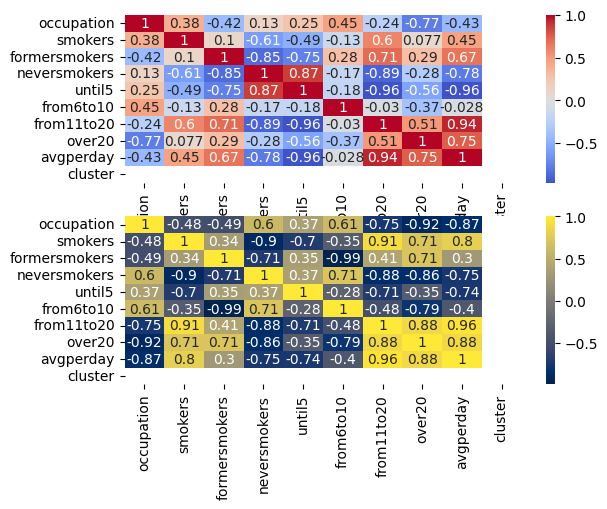

In [6]:
# clustering

kmean=KMeans(n_clusters=2)
kmean.fit(db1)
labels=kmean.labels_
db1["cluster"]=labels
db2=db1[db1["cluster"]==0]  # dividing db in 2 db for clustering
db3=db1[db1["cluster"]==1]
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
sns.heatmap(db2.corr(), annot=True, cmap="coolwarm", center=0, ax=ax1)
sns.heatmap(db3.corr(), annot=True, cmap="cividis", center=0, ax=ax2)
plt.tight_layout
# print(db3)

In [7]:
# creating the model

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier




x=db1.drop(columns=["occupation","cluster"])
y=db1["occupation"]
model=LogisticRegression()
# result=cross_validate(model,x,y,cv=10)
# print(result["test_score"].mean())

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=0)
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(pred)
print(accuracy_score(ytest,pred))


[0 1 2 3]
0.0


In [8]:
# trying the model
df1=db.loc[1]
df=pd.DataFrame({"smokers":[20.2,24.0],
                 "formersmokers":[28.0,24.6],
                 "neversmokers":[50.8,50.4],
                 "until5":[29.6,25.3],
                 "from6to10":[31.9,35.6],
                 "from11to20":[34.1,35.5],
                 "over20":[4.3,3.5],
                 "avgperday":[11.3,11.2]}, index=[0,1])

df2=db.copy()
df2=df2.loc[0,:]

df["smokers"]=scalersmokers.transform(df[["smokers"]])
df["formersmokers"]=scalerformersmokers.transform(df[["formersmokers"]])
df["neversmokers"]=scalerneversmokers.transform(df[["neversmokers"]])
df["until5"]=scaleruntil5.transform(df[["until5"]])
df["from6to10"]=scalerfrom5to10.transform(df[["from6to10"]])
df["from11to20"]=scalerfrom11to20.transform(df[["from11to20"]])
df["over20"]=scalerover20.transform(df[["over20"]])
df["avgperday"]=scaleravgperday.transform(df[["avgperday"]])
# print(df)
prediction=model.predict(df)
# print(prediction)
results=pd.DataFrame({"occupation":prediction})
results["occupation"]=scaloccupation.inverse_transform(results[["occupation"]])
print(results)

# print(db.head())

                            occupation
0    executive, employer, professional
1                      employed person


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
